In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
class Integrator():
    
    def __init__(self,f, h):
        self.function = f
        self.h = h
        self.times = None
        self.qs = None
        self.ps = None
    
    def step(self, t, q, p):
        
        q,p = self.function(q,p)
        
        return t, q, p
    
    def integrate(self, interval, q, p):
        
        t = interval[0]
        t_fin = interval[1]
        
        self.times = [t]
        self.qs = [q]
        self.ps = [p]
        
        while t<t_fin:
            
            t, q, p = self.step(t, q, p)
            
            self.times.append(t)
            self.qs.append(q)
            self.ps.append(p)

    def plot_orbit(self):
    
        plt.plot(self.qs, self.ps)
        ax  = plt.gca()
        ax.axis('equal')

            
    
    

In [3]:
class SymplecticEuler(Integrator):
    
    def step(self, t, q, p):
        
        Q, P = self.function(q,p)
        
        p = p + self.h*P
        
        Q, P = self.function(q,p)
        
        q = q + self.h*Q
        
        t = t+self.h
        
        return t, q, p

In [4]:
class ForwardEuler(Integrator):
    
    def step(self, t, q, p):
        
        Q, P = self.function(q,p)
        
        p = p + self.h*P
                
        q = q + self.h*Q
        
        t = t+self.h
        
        return t, q, p

In [13]:
class RungeKutta4(Integrator):
    
    def step(self, t, q, p):
        
        Q1, P1 = self.function(q,p)
        
        Q2, P2 = self.function(q+Q1*self.h/2, p + P1*self.h/2)
        
        Q3, P3 = self.function(q+Q2*self.h/2, p + P2*self.h/2)
        
        Q4, P4 = self.function(q+Q3*self.h, p + P3*self.h)
        
        q = q + 1/6*self.h*(Q1 + 2*Q2 + Q3 +Q4)

        p = p + 1/6*self.h*(P1 + 2*P2 + P3 +P4)

        t = t + self.h

        return t, q, p

In [19]:
class SymplecticOrder4(Integrator):
    
    def step(self, t, q, p):
        
        c1 = 1/(2*(2-2**(1/3)))
        c4 = c1
        c2 = (1 - 2**(1/3))/(2*(2-2**(1/3)))
        c3 = c2
        
        d1 = 1/((2-2**(1/3)))
        d3 = d1
        
        d2 = ( - 2**(1/3))/(2-2**(1/3))
        
       
        q = self.Q_step(c4, q, p)

        p = self.P_step(d3, q, p)
        
        q = self.Q_step(c3, q, p)

        p = self.P_step(d2, q, p)
        
        q = self.Q_step(c2, q, p)

        p = self.P_step(d1, q, p)
        
        q = self.Q_step(c1, q, p)
        
        t = t + self.h

        return t, q, p
    
    def Q_step(self, c, q, p):
        
        Q, P = self.function(q,p)
        
        q = q + self.h*c*Q
        
        return q
    
    def P_step(self, d, q, p):
        
        Q, P = self.function(q,p)
        
        p = p + self.h*d*P
        
        return p   

In [7]:
def hoscillator(q,p):
    #Hamilton

    q_out = p
    
    p_out = -q
    
    return q_out, p_out


In [8]:
sympeuler = SymplecticEuler(hoscillator,0.1)

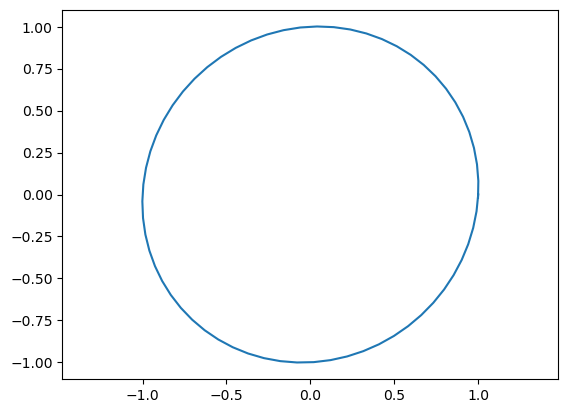

In [9]:

sympeuler.integrate([0,2*np.pi],1,0)

sympeuler.plot_orbit()

In [10]:
forweuler = ForwardEuler(hoscillator,0.1)


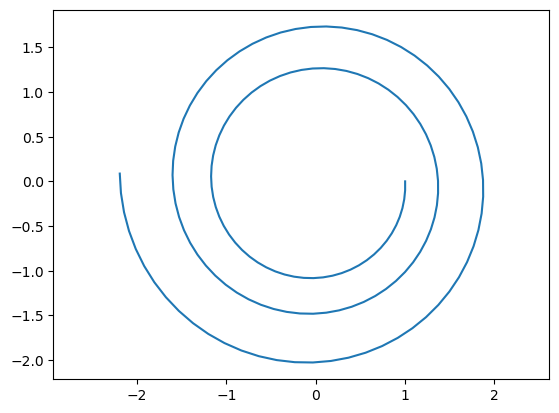

In [11]:
forweuler.integrate([0,5*np.pi],1,0)

forweuler.plot_orbit()

In [14]:
rk4 = RungeKutta4(hoscillator,0.1)


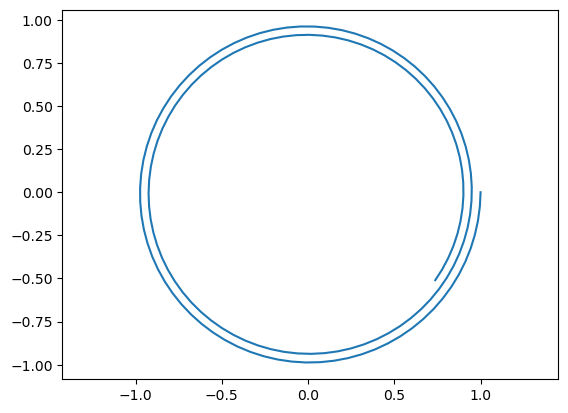

In [15]:
rk4.h = 0.1

rk4.integrate([0,5*np.pi],1,0)

rk4.plot_orbit()

In [20]:
sympO4 = SymplecticOrder4(hoscillator,0.1)

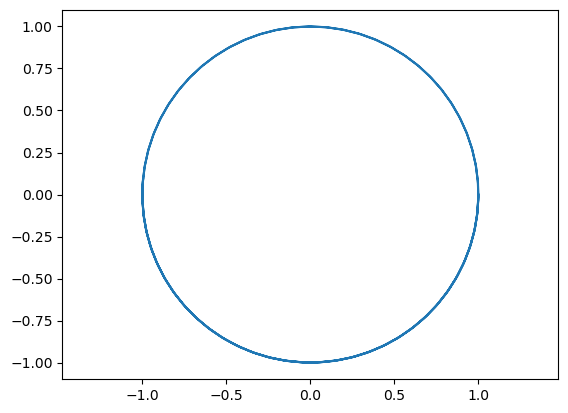

In [22]:
sympO4.h = 0.1

sympO4.integrate([0,5*np.pi],1,0)

sympO4.plot_orbit()

In [ ]:
plt.plot(test.qs, test.ps)

In [ ]:
t, q, p = 0, 1, 0

solution = []

for i in range(10):

    t, q, p = test.step(t, q, p)
    
    solution.append((t ,q, p))
    
    

In [ ]:
solution